In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns

data = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [2]:
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


---

Determine the relationship between the discrete data in the data set and Price

---

In [3]:
xSet = data[['Mileage', 'Cylinder', 'Doors']]
ySet = data['Price']

xSet[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].as_matrix())

print (xSet)

NameError: name 'scale' is not defined

In [4]:
total = sm.OLS(ySet, xSet).fit()

total.summary()

NameError: name 'sm' is not defined

Here, it is evident that Cylinder has the greatest factor for price as it has the largest coef. 

---

Proof: 

In [5]:
ySet.groupby(data.Cylinder).mean()

Cylinder
4    17862.564874
6    20081.395841
8    38968.043180
Name: Price, dtype: float64

----

My initial assumption was that miles and price had a correlation: 

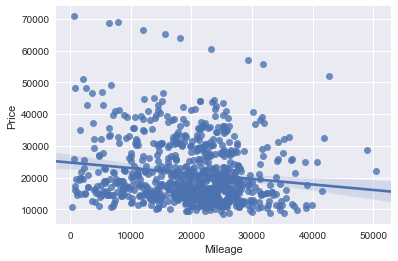

In [6]:

sns.set(style='darkgrid', color_codes=True)

c = sns.regplot(data=data, x='Mileage', y='Price')

It is clear that there is no correlation 

To further prove this... what is r squared:


In [7]:
from sklearn.metrics import r2_score

x = data[['Mileage']]
y = data[['Price']]

r2 = r2_score(y, x)

print(r2)


-0.948170025851


As a result, r sqaured is almost 0 indicating that there is no correlation